In [183]:
import os
import time as t
import re
import numpy as np
import math
from os import listdir
from os.path import isfile, join

from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as patches
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.gridspec as gridspec
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)

from scipy.ndimage import imread
from scipy import ndimage
from scipy.ndimage.filters import gaussian_filter

from PIL import Image

from utils import *

In [10]:
path_input = u'e:\\Data\\burst\\'
path_output = u'e:\\Data\\burst\\'

orig = read_tiff(path_input + 'vid_1_orig.tif', 100)
flow = read_tiff(path_input + 'vid_2_flow.tif', 100)
amp = read_tiff(path_input + 'vid_amp_raw.tif', 100)
mask= read_tiff(path_input + 'vid_amp_mask_cleamed.tif', 100)

In [193]:
w = orig[0].shape[1]
h = orig[0].shape[0]

index_remove_raw = np.array([2,9,10,17,18,25,32,33,40,41,48,49,56,64,71,72,79,
                             80,87,88,95,102,103,110,111,114,115]) - 1 

In [168]:
import matplotlib.image as image

color_code = image.imread(path_input + '\\figures\\color.tif')
vel_code = image.imread(path_input + '\\figures\\vel_bar.tif')

In [196]:
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')

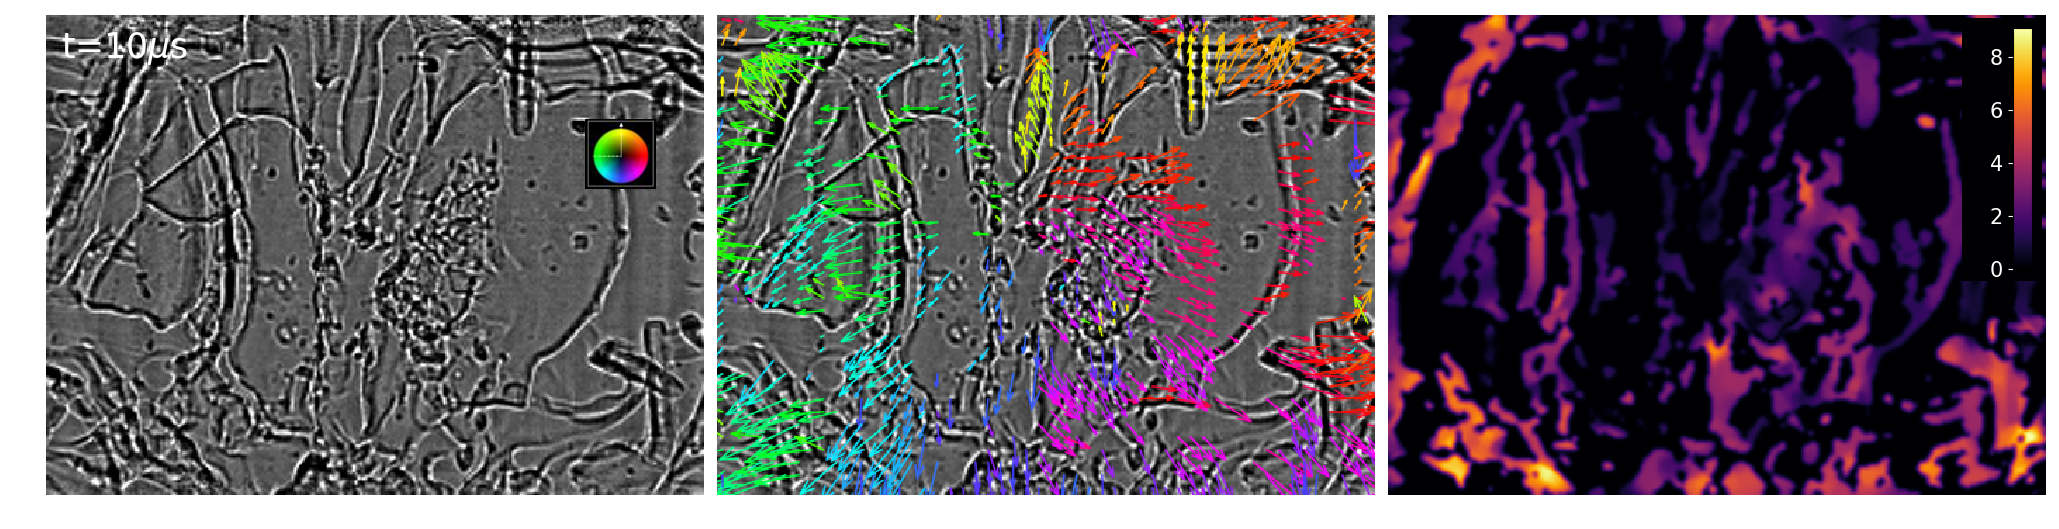

In [219]:

i = 10

plt.style.use('default')

fig = plt.figure()

fig.set_size_inches(20, 10, forward=True)
plt.subplots_adjust(top=1.0, bottom=0.0, left=0.0, right=1.0, wspace=0.02, hspace=0.1 )

gs = gridspec.GridSpec(1, 3)

ax0 = plt.subplot(gs[0, 0])
ax0.text(10, 30, r't=10$\mu$s', fontsize=25, color='white', weight='normal')
plt.axis('off')
plt.imshow(orig[i], cmap='gray')

ax1 = plt.subplot(gs[0, 1])
plt.axis('off')
plt.imshow(flow[i])

res = amp[i]*mask[i]
res[3:190, w-60:w-3] = 0

ax2 = plt.subplot(gs[0, 2])
plt.axis('off')
plt.imshow(res, cmap='inferno')


cbaxes = inset_axes(ax2, width="3%", height="50%", loc=1, borderpad=1) 
cbaxes.tick_params(color='white', labelcolor='white', labelsize = 15)
cbaxes.patch.set_facecolor([1,1,0,0.5])
plt.colorbar(cax=cbaxes, orientation='vertical')
cbaxes.yaxis.set_ticks_position('left')

fig.figimage(color_code, 585, 340, zorder=3)
#fig.figimage(vel_code, 1570, 140, zorder=3)

#fig.figimage(color_code, 0, fig.bbox.ymax - h, zorder=3)
    
plt.savefig(path_input + 'test.tif')
plt.show()

<Figure size 432x288 with 0 Axes>

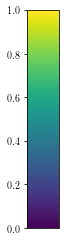

In [106]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.viridis()

fig=plt.figure()
c_ax=plt.subplot(199)

cb = mpl.colorbar.ColorbarBase(c_ax,orientation='vertical')

c_ax.yaxis.set_ticks_position('left')

plt.savefig('my_colorbar.png')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Anaconda2\\envs\\py36\\lib\\site-packages\\matplotlib\\mpl-data\\sample_data\\grace_hopper.png'

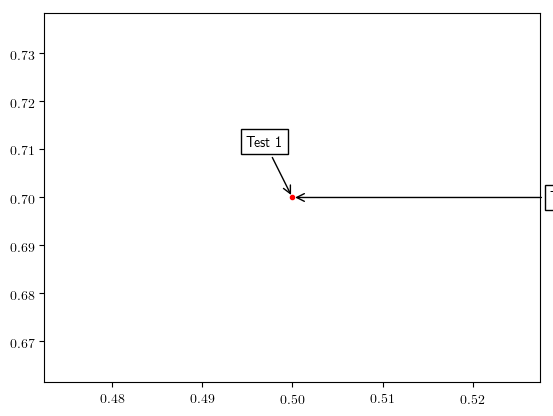

In [189]:
from matplotlib.patches import Circle
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from matplotlib.cbook import get_sample_data

if 1:
    fig, ax = plt.subplots()

    # Define a 1st position to annotate (display it with a marker)
    xy = (0.5, 0.7)
    ax.plot(xy[0], xy[1], ".r")

    # Annotate the 1st position with a text box ('Test 1')
    offsetbox = TextArea("Test 1", minimumdescent=False)

    ab = AnnotationBbox(offsetbox, xy,
                        xybox=(-20, 40),
                        xycoords='data',
                        boxcoords="offset points",
                        arrowprops=dict(arrowstyle="->"))
    ax.add_artist(ab)

    # Annotate the 1st position with another text box ('Test')
    offsetbox = TextArea("Test", minimumdescent=False)

    ab = AnnotationBbox(offsetbox, xy,
                        xybox=(1.02, xy[1]),
                        xycoords='data',
                        boxcoords=("axes fraction", "data"),
                        box_alignment=(0., 0.5),
                        arrowprops=dict(arrowstyle="->"))
    ax.add_artist(ab)

    # Define a 2nd position to annotate (don't display with a marker this time)
    xy = [0.3, 0.55]

    # Annotate the 2nd position with a circle patch
    da = DrawingArea(20, 20, 0, 0)
    p = Circle((10, 10), 10)
    da.add_artist(p)

    ab = AnnotationBbox(da, xy,
                        xybox=(1.02, xy[1]),
                        xycoords='data',
                        boxcoords=("axes fraction", "data"),
                        box_alignment=(0., 0.5),
                        arrowprops=dict(arrowstyle="->"))

    ax.add_artist(ab)

    # Annotate the 2nd position with an image (a generated array of pixels)
    arr = np.arange(100).reshape((10, 10))
    im = OffsetImage(arr, zoom=2)
    im.image.axes = ax

    ab = AnnotationBbox(im, xy,
                        xybox=(-50., 50.),
                        xycoords='data',
                        boxcoords="offset points",
                        pad=0.3,
                        arrowprops=dict(arrowstyle="->"))

    ax.add_artist(ab)

    # Annotate the 2nd position with another image (a Grace Hopper portrait)
    fn = get_sample_data("grace_hopper.png", asfileobj=False)
    arr_img = plt.imread(fn, format='png')

    imagebox = OffsetImage(arr_img, zoom=0.2)
    imagebox.image.axes = ax

    ab = AnnotationBbox(imagebox, xy,
                        xybox=(120., -80.),
                        xycoords='data',
                        boxcoords="offset points",
                        pad=0.5,
                        arrowprops=dict(
                            arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=90,rad=3")
                        )

    ax.add_artist(ab)

    # Fix the display limits to see everything
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    plt.show()